(-0.5, 1983.5, 1115.5, -0.5)

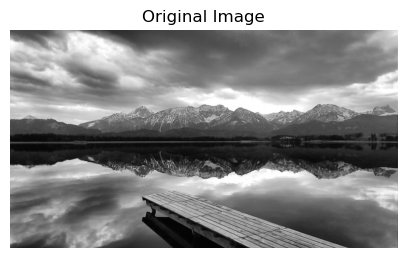

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = r'..\image.jpg'
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Cannot load image at {img_path}")
# Convert BGR→RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')


(-0.5, 1983.5, 1115.5, -0.5)

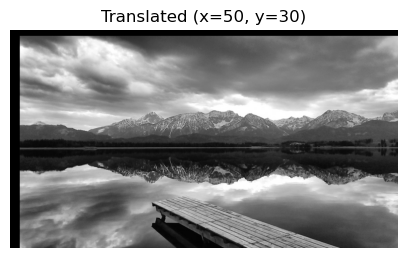

In [2]:
# Translation
# shift right by 50 px, down by 30 px
tx, ty = 50, 30
M_trans = np.array([[1, 0, tx],
                    [0, 1, ty]], dtype=np.float32)
translated = cv2.warpAffine(img, M_trans, (img.shape[1], img.shape[0]))
translated_rgb = cv2.cvtColor(translated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(translated_rgb)
plt.title(f"Translated (x={tx}, y={ty})")
plt.axis('off')


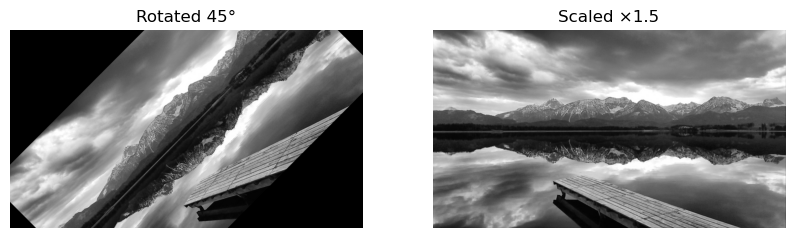

In [3]:
# Rotation & Scaling
h, w = img.shape[:2]
center = (w//2, h//2)

# Rotate 45° about center
angle = 45
M_rot = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M_rot, (w, h))
rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)

# Scale by 1.5× around top-left corner
scale = 1.5
M_scale = np.array([[scale, 0, 0],
                    [0, scale, 0]], dtype=np.float32)
scaled = cv2.warpAffine(img, M_scale, (int(w*scale), int(h*scale)))
scaled_rgb = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(rotated_rgb)
axes[0].set_title(f"Rotated {angle}°")
axes[1].imshow(scaled_rgb)
axes[1].set_title(f"Scaled ×{scale}")
for ax in axes:
    ax.axis('off')
plt.show()


(-0.5, 2317.5, 1115.5, -0.5)

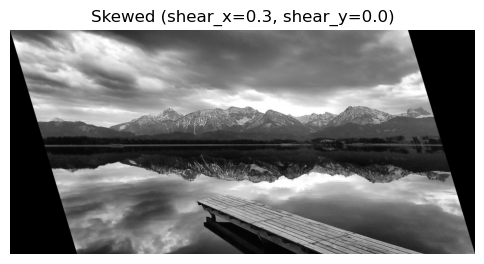

In [4]:
#  Skewing (Shear)
# shear X by 0.3, shear Y by 0.0
shear_x = 0.3
shear_y = 0.0
M_shear = np.array([[1, shear_x, 0],
                    [shear_y, 1, 0]], dtype=np.float32)
# output width increased to accommodate skew
new_w = int(w + abs(shear_x) * h)
new_h = int(h + abs(shear_y) * w)
sheared = cv2.warpAffine(img, M_shear, (new_w, new_h))
sheared_rgb = cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(sheared_rgb)
plt.title(f"Skewed (shear_x={shear_x}, shear_y={shear_y})")
plt.axis('off')
